In [1]:
import pandas as pd
import numpy as np
import sqlite3
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [3]:
hop_output = pd.read_csv('data/neo4j_nppes_output.csv')
hop_output

,NPI,ProviderFirstName,ProviderLastName(LegalName),ProviderOrganizationName(LegalBusinessName),EntityTypeCode,HealthcareProviderTaxonomyCode,community,Code,Grouping,Classification,Specialization,Definition,Notes,Display Name,Section
0,1922001957,RICHARD,PRESLEY,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
1,1154324192,ELIZABETH,OLDFIELD,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
2,1235132408,LEWIS,BELLARDO,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
3,1376546481,MELANIE,DUNN,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
4,1144223223,MARTIN,HIRSCH,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,1629598453,NaN,NaN,"FEMALE PHYSICIANS OF TENNESSEE, P.C.",2,2088F0040X,4413,2088F0040X,Allopathic & Osteopathic Physicians,Urology,Female Pelvic Medicine and Reconstructive Surgery,A subspecialist in Female Pelvic Medicine and ...,"Source: American Board of Medical Specialties,...",Female Pelvic Medicine and Reconstructive Surg...,Individual
4754,1952388977,MARCY,ABEL,NaN,1,2088F0040X,4413,2088F0040X,Allopathic & Osteopathic Physicians,Urology,Female Pelvic Medicine and Reconstructive Surgery,A subspecialist in Female Pelvic Medicine and ...,"Source: American Board of Medical Specialties,...",Female Pelvic Medicine and Reconstructive Surg...,Individual
4755,1164557856,NaN,NaN,SOUTHSTREET FAMILY MEDICAL CENTER,2,305R00000X,4454,305R00000X,Managed Care Organizations,Preferred Provider Organization,NaN,A group of physicians and/or hospitals who con...,"Source: ""Glossary of terms used in managed car...",Preferred Provider Organization,Non-Individual
4756,1982651360,JENNIFER,ERICH,NaN,1,207PH0002X,1321,207PH0002X,Allopathic & Osteopathic Physicians,Emergency Medicine,Hospice and Palliative Medicine,An emergency medicine physician with special k...,Source: American Academy of Hospice and Pallia...,Hospice and Palliative Medicine (Emergency Med...,Individual


In [31]:
hop_output['community'].nunique()
# Number of unique Community ID's in our final data set from the Neo4j output.

309

In [32]:
hop_output['NPI'].nunique()
# Number of unique NPI's in our final data set from the Neo4j output.

4758

In [33]:
hop_output['ProviderOrganizationName(LegalBusinessName)'].nunique()
# Number of unique Provider Organizations in our final data set from the Neo4j output.

337

In [34]:
hop_output['Classification'].nunique()
# Number of unique Classifications in our final data set from the Neo4j output.

74

In [35]:
hop_output['Specialization'].nunique()
# Number of unique Specializations in our final data set from the Neo4j output.

131

In [39]:
hop_output['Grouping'].nunique()
# Number of unique Specializations in our final data set from the Neo4j output.

22

In [ ]:
#hop_output.rename(columns={"community": "Community ID"})

<AxesSubplot:xlabel='community'>

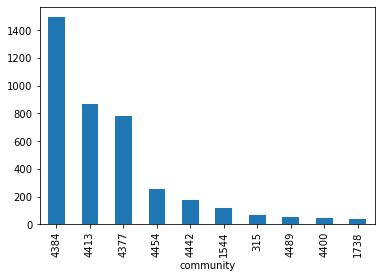

In [22]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['community'])['NPI'].nunique().sort_values(ascending = False).head(10).plot(kind = 'bar')
# NPI's by Community ID

<AxesSubplot:xlabel='community'>

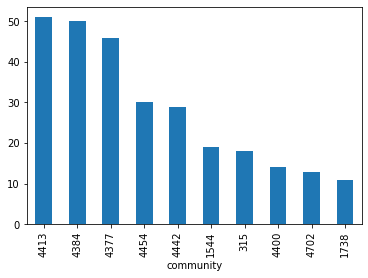

In [19]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['community'])['Classification'].nunique().sort_values(ascending = False).head(10).plot(kind = 'bar')
# Classifications by Community ID

<AxesSubplot:xlabel='community'>

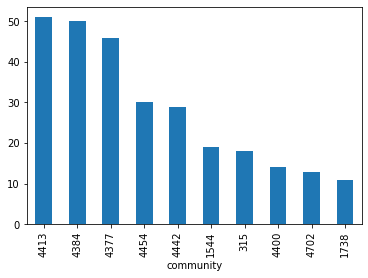

In [20]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['community'])['Classification'].nunique().sort_values(ascending = False).head(10).plot(kind = 'bar')
# Specializations by Community ID

<AxesSubplot:xlabel='community'>

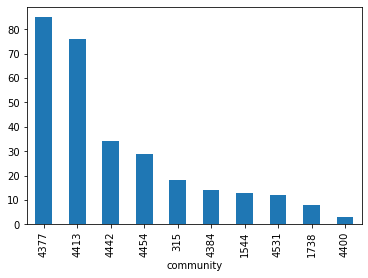

In [21]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['community'])['ProviderOrganizationName(LegalBusinessName)'].nunique().sort_values(ascending = False).head(10).plot(kind = 'bar')
# Provider Organizations by Community ID

<AxesSubplot:xlabel='ProviderOrganizationName(LegalBusinessName)'>

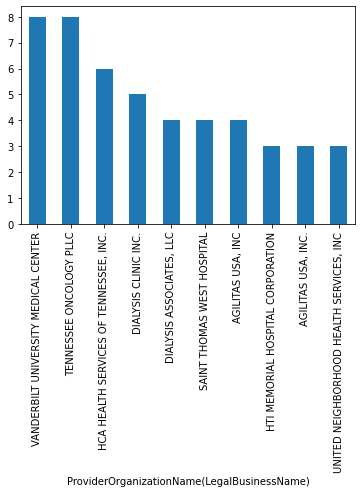

In [14]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['ProviderOrganizationName(LegalBusinessName)'])['community'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')
# Community ID's by Provider Organization

<AxesSubplot:xlabel='Classification'>

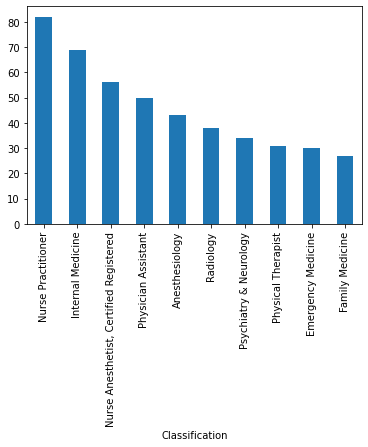

In [25]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['Classification'])['community'].nunique().sort_values(ascending = False).head(10).plot(kind = 'bar')
# Community ID's by Classification

<AxesSubplot:xlabel='ProviderOrganizationName(LegalBusinessName)'>

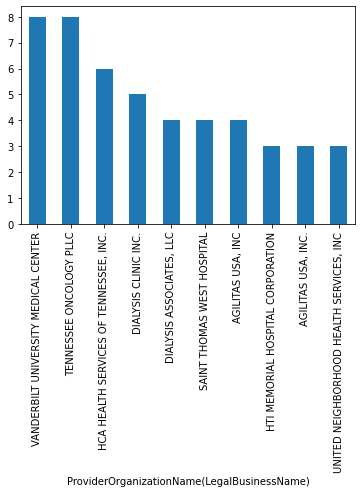

In [27]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['ProviderOrganizationName(LegalBusinessName)'])['NPI'].nunique().sort_values(ascending = False).head(10).plot(kind = 'bar')
# NPI's by Provider Organization

<AxesSubplot:xlabel='Classification'>

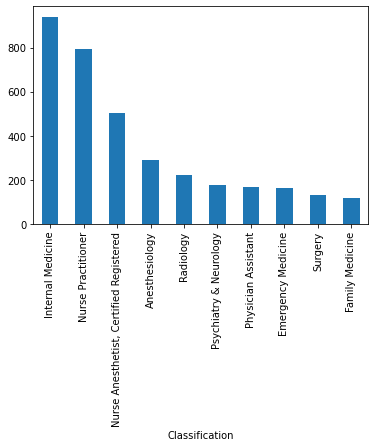

In [28]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['Classification'])['NPI'].nunique().sort_values(ascending = False).head(10).plot(kind = 'bar')
# NPI's by Classification

<AxesSubplot:xlabel='Specialization'>

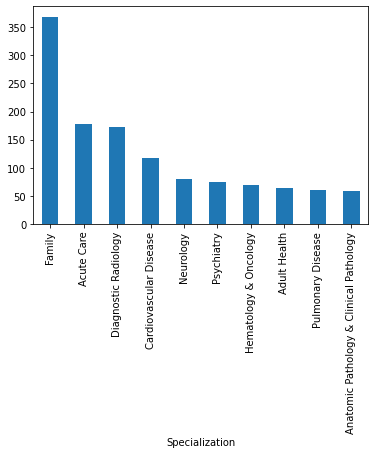

In [30]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['Specialization'])['NPI'].nunique().sort_values(ascending = False).head(10).plot(kind = 'bar')
# NPI's by Specialization

In [ ]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(hop_output[hop_output['ProviderOrganizationName(LegalBusinessName)'].astype(str).str.contains('VANDERBILT')])['community'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')
#hop_output[hop_output['ProviderOrganizationName(LegalBusinessName)'].astype(str).str.contains('VANDERBILT')].count()